In [1]:
import pandas as pd
import numpy as np
patents = pd.read_excel('datasets/patents_AGRI.xlsx')
patents['Count'] = 1

patents['agricultur_patent'] = np.where( (patents['count_matches']==0), 0,1)
patents['agricultur_patent_yes'] = np.where( (patents['count_matches']==0), "no", "yes")
patents.Count.sum()

15954

In [2]:
pd.set_option('display.max_columns', None)
patents.head(10)

,Unnamed: 0,Unnamed: 0.1,id,type,number,country,date,abstract,title,kind,num_claims,filename,withdrawn,matches,count_matches,count_unique_matches,date_str,link,First_year,After_1992,Count,agricultur_patent,agricultur_patent_yes
0,2765,4356203,8033047,utility,8033047,US,2011-10-11,An algae cultivation system and method. In an ...,Algae cultivation systems and methods,B2,14,ipg111011.xml,0.0,'cultivation',9,1,20111011,https://worldwide.espacenet.com/publicationDet...,2011,1,1,1,yes
1,15183,2392876,6105309,utility,6105309,US,2000-08-22,The plant cultivation apparatus and plant cul...,Plant cultivation method and apparatus,A,11,pftaps20000822_wk34.zip,0.0,'cultivation',9,1,20000822,https://worldwide.espacenet.com/publicationDet...,2000,1,1,1,yes
2,1583,2269111,5981271,utility,5981271,US,1999-11-09,Process of outdoor thin-layer cultivation of ...,Process of outdoor thin-layer cultivation of m...,A,9,pftaps19991109_wk45.zip,0.0,'cultivation',9,1,19991109,https://worldwide.espacenet.com/publicationDet...,1999,1,1,1,yes
3,11685,86484,10087113,utility,10087113,US,2018-10-02,The present invention relates to a composition...,"Composition for fertilizing agricultural land,...",B2,20,ipg181002.xml,NaN,"'agricultural', 'agriculture'",6,1,20181002,https://worldwide.espacenet.com/publicationDet...,2018,1,1,1,yes
4,4318,2627510,6340654,utility,6340654,US,2002-01-22,A freshness-retaining agent for an agricultura...,Freshness-retaining agent and method for agric...,B1,12,pg020122.zip,0.0,'agricultural',5,1,20020122,https://worldwide.espacenet.com/publicationDet...,2002,1,1,1,yes
5,669,743659,4444882,utility,4444882,US,1984-04-24,Cultivation of microorganisms is controlled b...,Process and apparatus for controlling cultivat...,A,8,pftaps19840424_wk17.zip,0.0,'cultivation',4,1,19840424,https://worldwide.espacenet.com/publicationDet...,1984,0,1,1,yes
6,2998,5004972,8685707,utility,8685707,US,2014-04-01,The present disclosure describes use of filame...,"Construction material made of algae, method fo...",B2,21,ipg140401.xml,0.0,"'cultivation', 'harvesting'",4,1,20140401,https://worldwide.espacenet.com/publicationDet...,2014,1,1,1,yes
7,3313,5140762,8822200,utility,8822200,US,2014-09-02,Provided is an open diatom cultivation method ...,Method for open diatom cultivation,B2,6,ipg140902.xml,0.0,'cultivation',4,2,20140902,https://worldwide.espacenet.com/publicationDet...,2014,1,1,1,yes
8,9839,1103939,4805642,utility,4805642,US,1989-02-21,A process is provided for the dry treatment o...,Process for removing inorganic nitrate from ag...,A,13,pftaps19890221_wk08.zip,0.0,'agricultural',4,1,19890221,https://worldwide.espacenet.com/publicationDet...,1989,0,1,1,yes
9,13022,2983753,6698134,utility,6698134,US,2004-03-02,The present invention discloses a method and a...,Method of cultivating fresh spirulina at home ...,B1,10,pg040302.zip,0.0,'cultivation',3,1,20040302,https://worldwide.espacenet.com/publicationDet...,2004,1,1,1,yes


In [3]:
patents.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'type', 'number', 'country', 'date',
       'abstract', 'title', 'kind', 'num_claims', 'filename', 'withdrawn',
       'matches', 'count_matches', 'count_unique_matches', 'date_str', 'link',
       'First_year', 'After_1992', 'Count', 'agricultur_patent',
       'agricultur_patent_yes'],
      dtype='object')

# Adjusting the dataset

#### Dates and status of the policy

In [4]:
patents.date = pd.to_datetime(patents.date)

In [5]:
type(patents.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
patents['First_year'] = pd.DatetimeIndex(patents['date']).year

# Subset the data to only include EU countries with patents as from 1992

In [7]:
patents=patents[patents["After_1992"]>0]
patents.Count.sum()

12478

# Plots
## patents per country

In [8]:
# pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pylab import rcParams

In [9]:
patents.country.unique()

array(['US'], dtype=object)

#### Dataset "kind"

In [10]:
# dataset aggregated to country level
kind=patents.groupby('kind').sum() # aggregate the data by country
kind['kind'] = kind.index # add rownames as columns
kind['kind_with_agricultur_patent'] = np.where((kind['agricultur_patent']>0), 1, 0)

# subset dataset with only agriculture patents
kind_subset=kind[kind["agricultur_patent"]>0] 
kind_subset=kind_subset.sort_values(by=['agricultur_patent'], ascending=False)

kind.head(10)

,Unnamed: 0,Unnamed: 0.1,num_claims,withdrawn,count_matches,count_unique_matches,date_str,First_year,After_1992,Count,agricultur_patent,kind,kind_with_agricultur_patent
kind,,,,,,,,,,,,,
A,32685381,6472500700,52779,1.0,38,3268,65063876457,6506167,3258,3258,17,A,1
B1,11561889,4733157886,25215,1.0,30,1365,27205602463,2720470,1355,1355,20,B1,1
B2,51913804,34134539014,134716,12.0,113,7840,156405599822,15640045,7771,7771,70,B2,1
E,32292,34727088,78,0.0,0,5,99774090,9977,5,5,0,E,0
E1,115264,125139443,576,0.0,0,18,361782226,36177,18,18,0,E1,0
H,2186,6911937,3,0.0,0,1,19950207,1995,1,1,0,H,0
H1,22803,27650652,37,0.0,2,4,80292416,8029,4,4,1,H1,1
P,12455,13874547,2,0.0,0,2,39860825,3986,2,2,0,P,0
P2,237107,242295749,35,0.0,0,35,703148544,70312,35,35,0,P2,0


Types of patents: https://www.epo.org/searching-for-patents/helpful-resources/first-time-here/definitions.html

#### Dataset "kind"

#### Patents per kind (all patents)

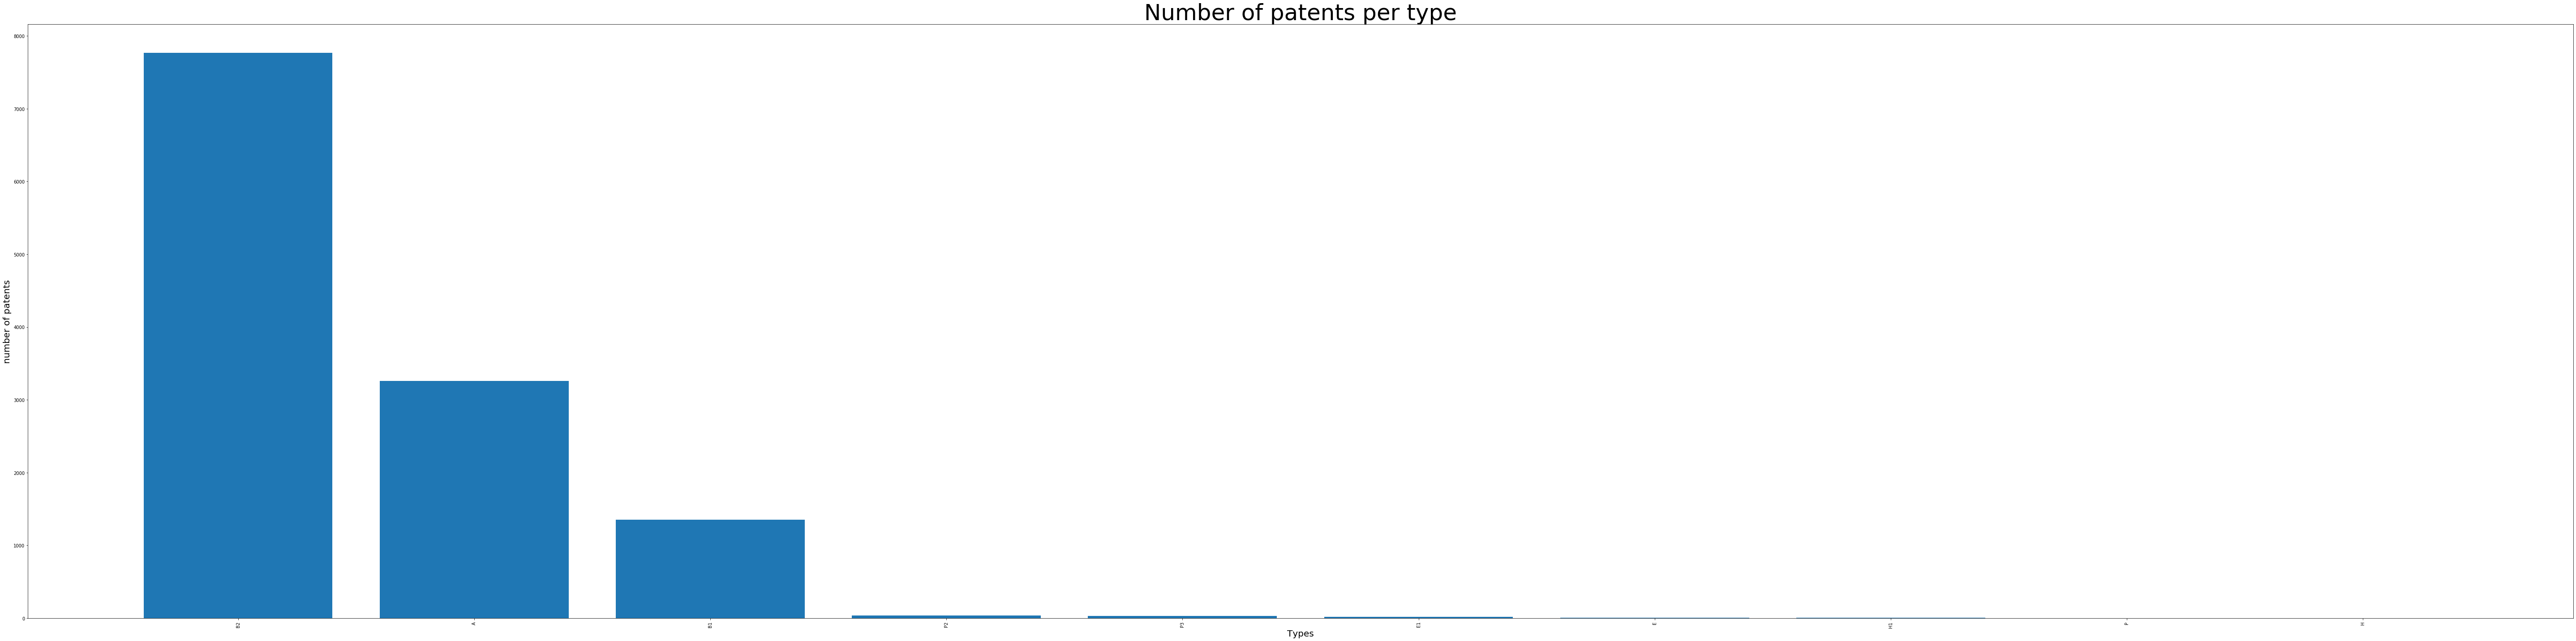

In [11]:
kind=kind.sort_values(by=['Count'], ascending=False)

rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

# plot 
x_units =(kind['kind'].to_list()) # change column to list to use it for the plot
y_units = (kind['Count'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('Types', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of patents per type', fontsize = 50)

plt.tight_layout()
plt.show()

#plt.savefig('Graphics/Patents_per_kind.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot 


#### patents per country (only agriculture)

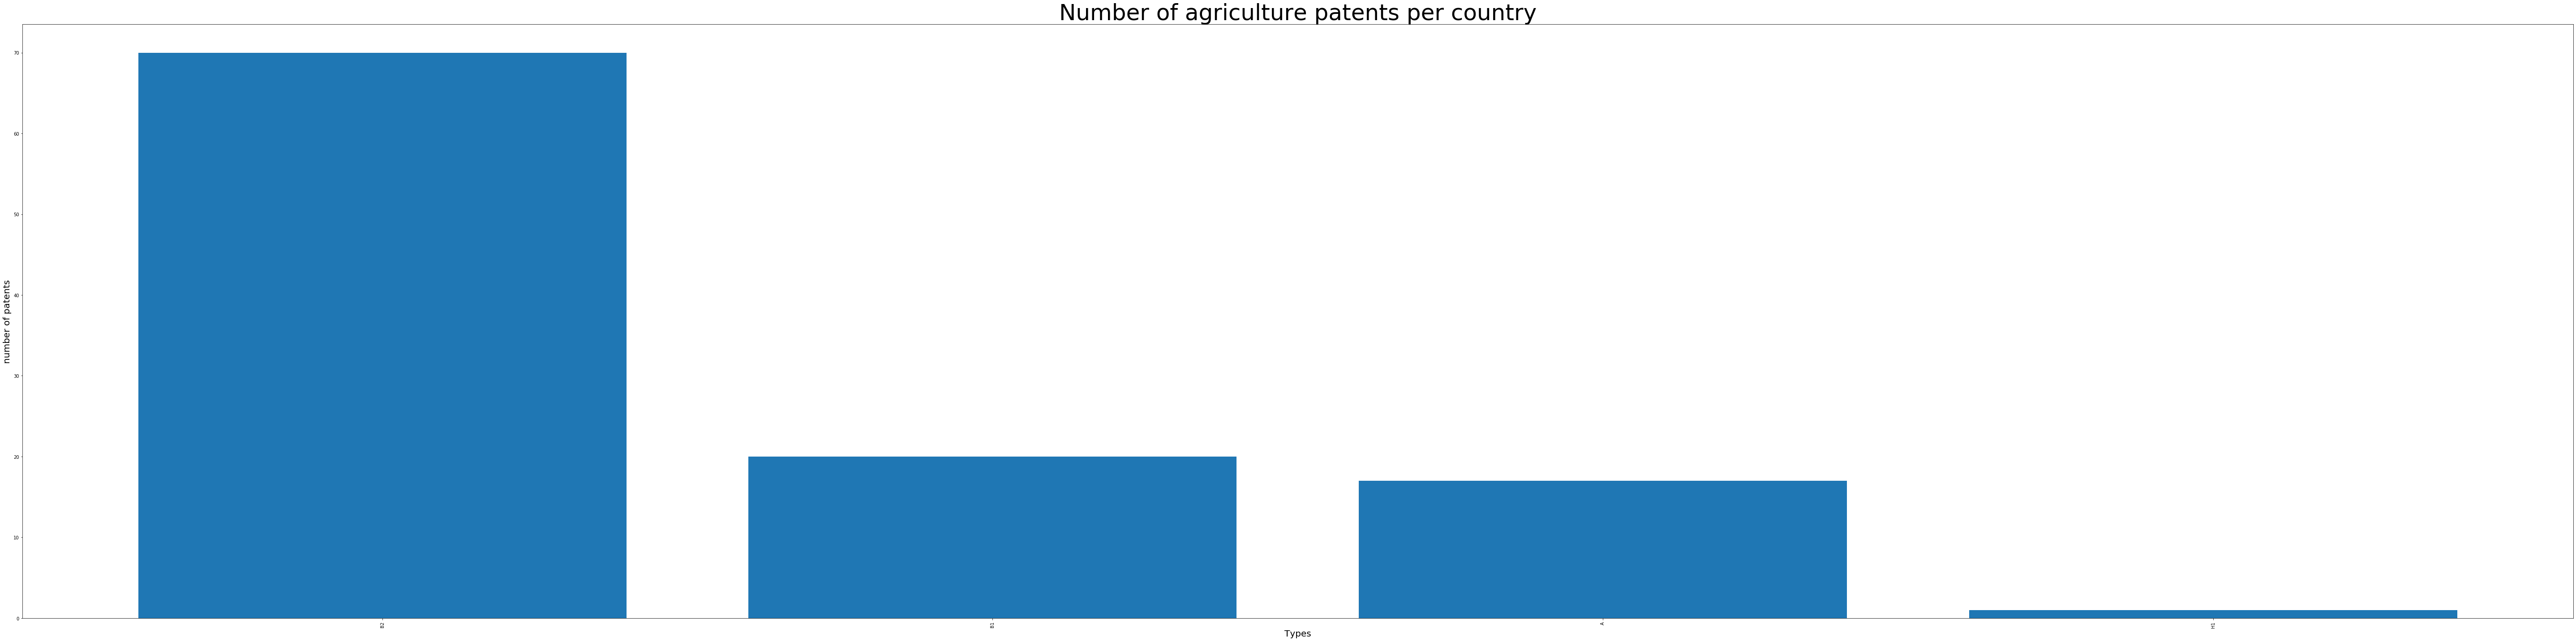

In [12]:
rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

# plot 
x_units =(kind_subset['kind'].to_list()) # change column to list to use it for the plot
y_units = (kind_subset['agricultur_patent'].to_list()) # change column to list to use it for the plot
plt.xticks(rotation=90) # rotates the lables of the x axis for better readability

plt.bar(x_units,y_units, width = 0.8)
plt.xlabel('Types', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of agriculture patents per country', fontsize = 50)

plt.tight_layout()
plt.show()

#plt.savefig('Graphics/Patents_agriculture_per_kind.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all patents + agricultural patents per type combined

Text(0.5, 1.0, 'Number of Patents per type')

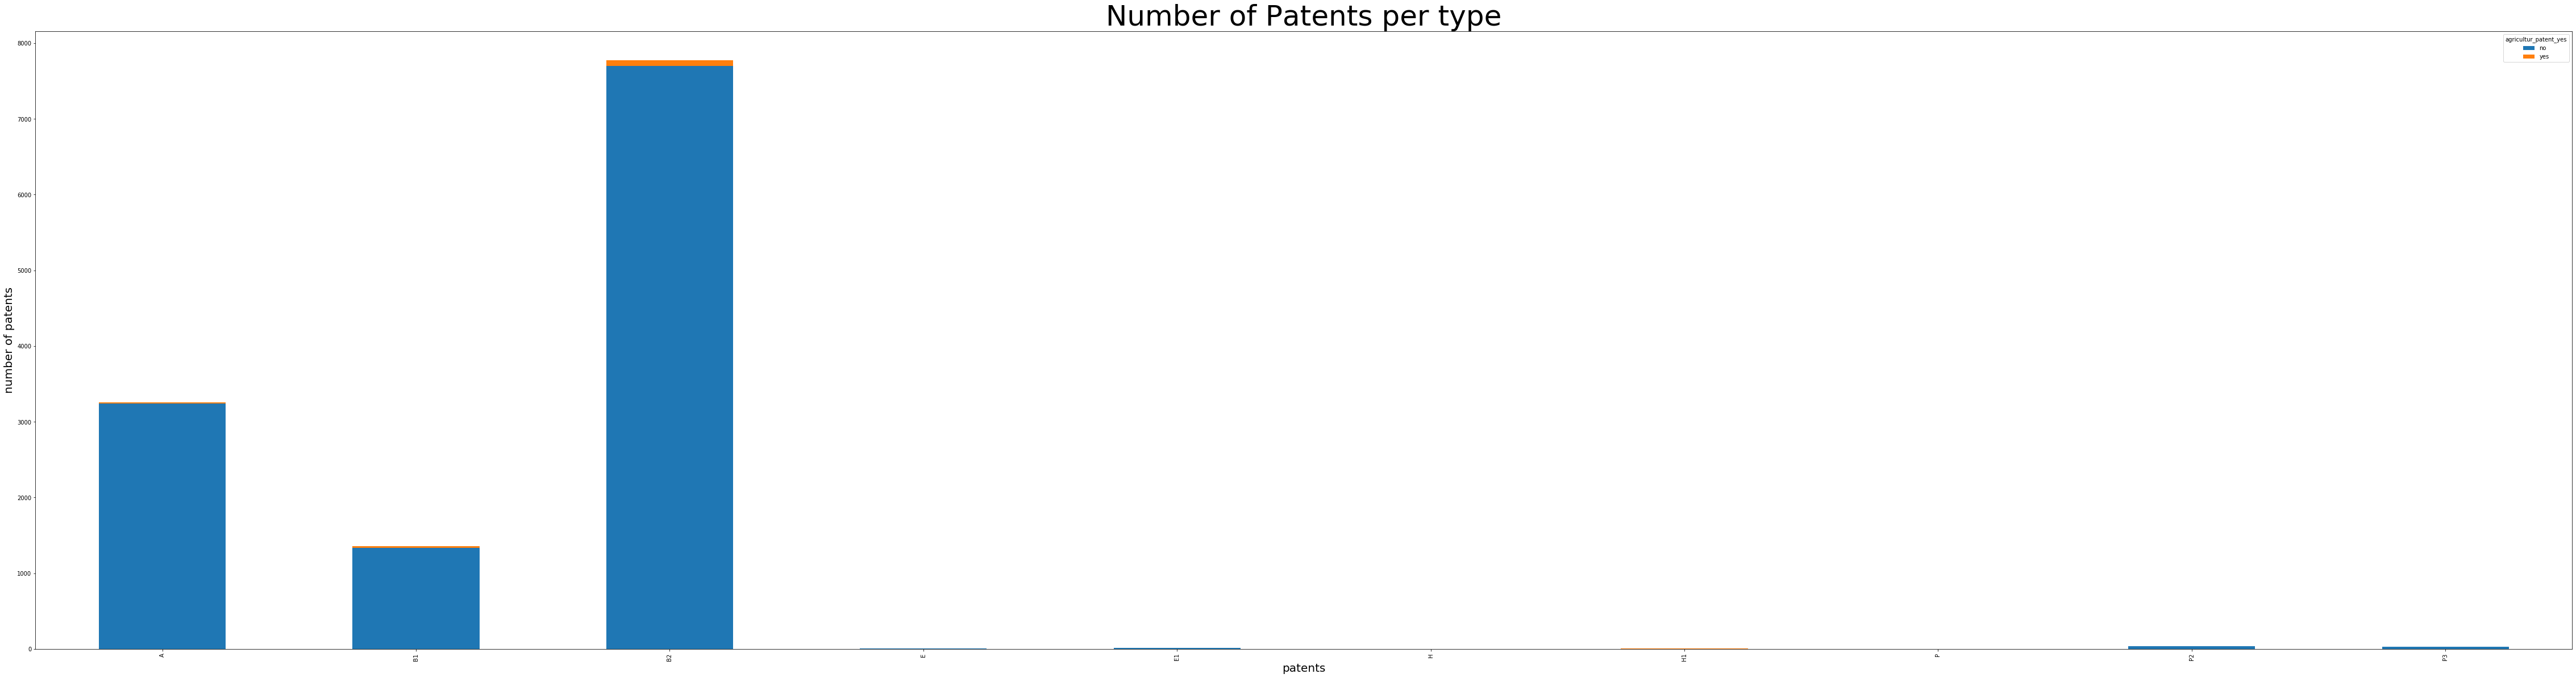

In [13]:
rcParams['figure.figsize'] = 80, 20 # changes the dimensions of the plot (width, height)

patents.groupby(['kind','agricultur_patent_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('patents', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
plt.title('Number of Patents per type', fontsize = 50)

#plt.savefig('Graphics/Patents_divided_per_kind.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### agricultural patents out of all patents ( 1 = agriculture patent)

Text(0.5, 1.0, 'Total number of agriculture and other patents')

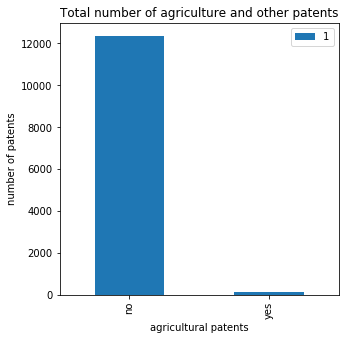

In [14]:
rcParams['figure.figsize'] = 5, 5 # changes the dimensions of the plot (width, height)

patents.groupby(['agricultur_patent','Count']).size().unstack().plot(kind='bar',stacked=True)
plt.xlabel('agricultural patents')
plt.ylabel('number of patents')
L=plt.legend()
plt.xticks((0,1), ("no","yes"))
plt.title('Total number of agriculture and other patents')


#plt.savefig('Graphics/ratio_agricultural_patents.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


# Patents per year

#### all patents + agricultural patents per year (ABSOLUT VALUES)

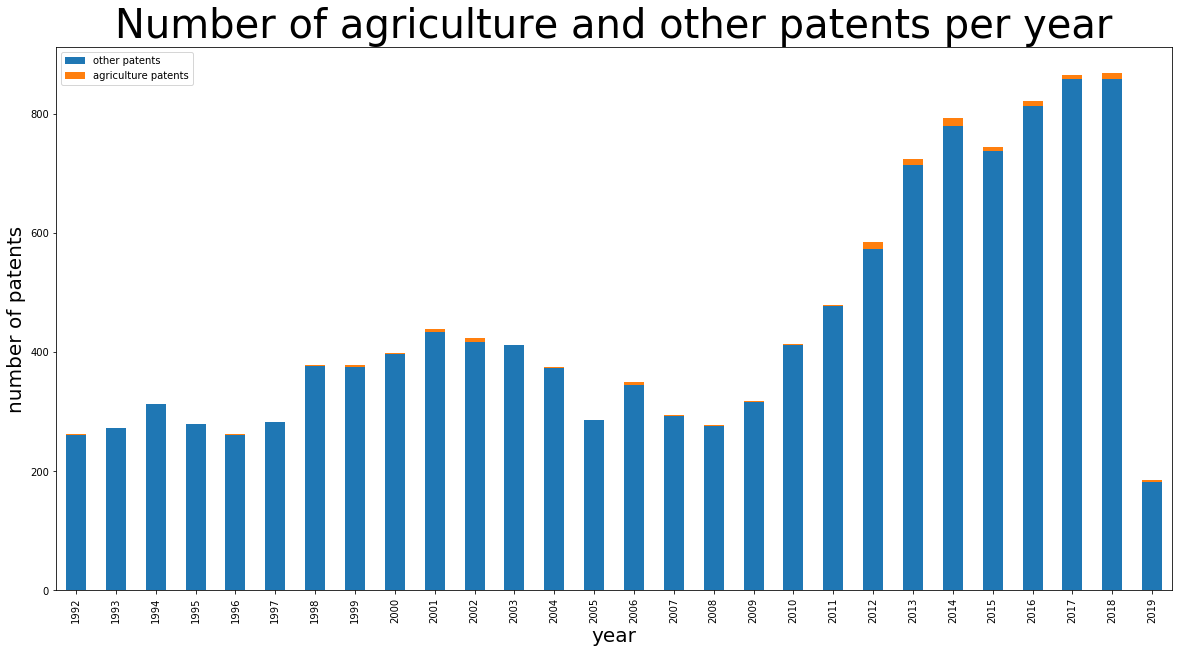

In [15]:
rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

patents.groupby(['First_year','agricultur_patent_yes']).size().unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('number of patents', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other patents')
L.get_texts()[1].set_text('agriculture patents')
plt.title('Number of agriculture and other patents per year', fontsize = 40)

plt.savefig('graphics/Patents_total_divided_per_year_absolut_new_keywords.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot


#### all patents + agricultural patents per year (PERCENTAGES)

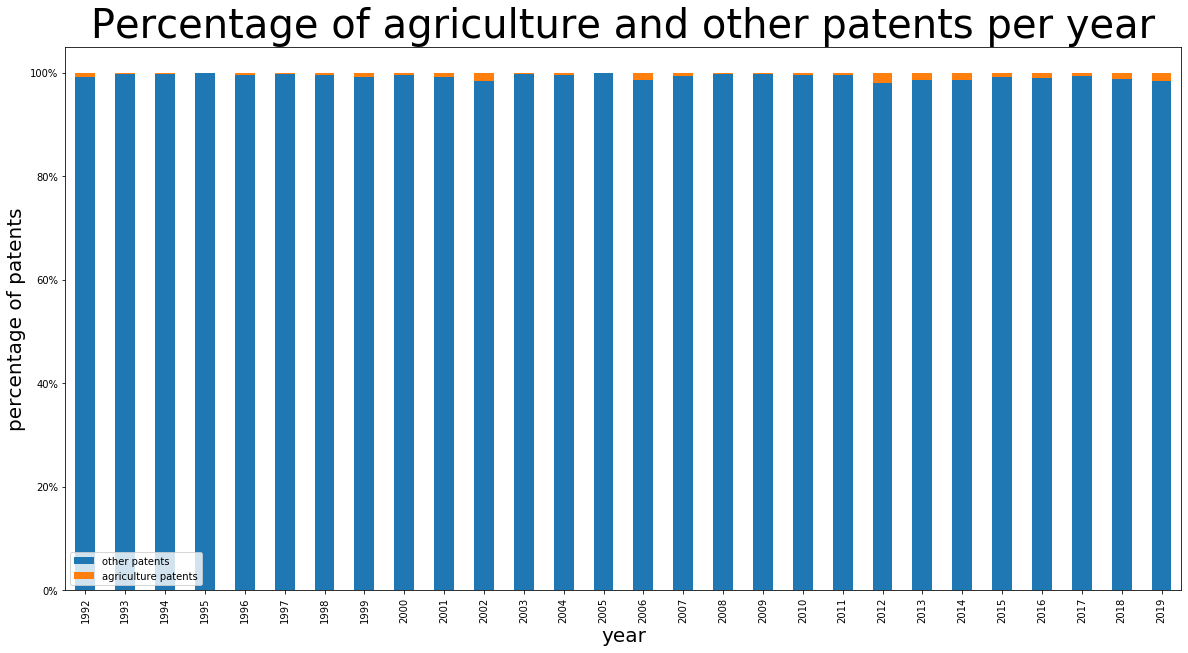

In [16]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 20, 10 # changes the dimensions of the plot (width, height)

patents.groupby(['First_year','agricultur_patent_yes']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.xlabel('year', fontsize = 20)
plt.ylabel('percentage of patents', fontsize = 20)
L=plt.legend()
L.get_texts()[0].set_text('other patents')
L.get_texts()[1].set_text('agriculture patents')
plt.title('Percentage of agriculture and other patents per year', fontsize = 40)


plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig('Graphics/Patents_total_divided_per_year_percentage_new_keywords.png', bbox_inches = "tight") # "tight" ensures that the whole labels are shown in the plot

In [17]:
# aggregate
Percentage = patents[['First_year', 'Count', 'agricultur_patent']].copy()
Percentage=Percentage.groupby('First_year').sum() # aggregate the data by country
Percentage['agriculture_patents_percentage'] = (Percentage['agricultur_patent'] / Percentage ['Count']) * 100
Percentage['other_patents_percentage'] = 100 - Percentage['agriculture_patents_percentage']

# add percentage change
AgriPat = Percentage['agricultur_patent'].tolist()
AgriPat
agriculture_patents_percentage_change = []
for x in range(1, len(AgriPat), 1):
    val_1 = AgriPat[x-1]
    if val_1 == 0.0: #Check if val_1 is 0.
        agriculture_patents_percentage_change.append('nan')
    else:
        val_2 = AgriPat[x]
        diff = int(round((float(val_2)/val_1)*100)) # change to float -->round--> int
        agriculture_patents_percentage_change.append(diff)
agriculture_patents_percentage_change.insert(0,'nan')
    
Percentage['agriculture_patents_percentage_change'] = agriculture_patents_percentage_change

Percentage.head(30)

,Count,agricultur_patent,agriculture_patents_percentage,other_patents_percentage,agriculture_patents_percentage_change
First_year,,,,,
1992,262,2,0.763359,99.236641,nan
1993,273,1,0.366300,99.633700,50
1994,313,1,0.319489,99.680511,100
1995,279,0,0.000000,100.000000,0
1996,262,1,0.381679,99.618321,nan
1997,283,1,0.353357,99.646643,100
1998,379,2,0.527704,99.472296,200
1999,378,3,0.793651,99.206349,150
2000,399,2,0.501253,99.498747,67
